# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


# 2. Load Titanic Dataset

In [2]:
# Load the Titanic dataset from the file path
train_data = pd.read_csv('.\\titanic\\train.csv')  # Adjust the path if necessary

# Show the first few rows of the dataset
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Inspect Dataset Structure

In [3]:
# Display basic information about the dataset
train_data.info()

# Summary statistics for numerical columns
train_data.describe()

# Check for missing values
train_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 4. Handle Missing Values

In [20]:
# Fill missing 'Age' with the median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())


In [21]:
# Fill missing 'Embarked' with the mode
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])


In [23]:
# Drop the 'Cabin' column only if it exists
if 'Cabin' in train_data.columns:
    train_data.drop(columns=['Cabin'], inplace=True)
else:
    print("'Cabin' column is not found in the DataFrame.")


'Cabin' column is not found in the DataFrame.


# 5. Convert Categorical Variables to Numeric

In [7]:
# Convert 'Sex' to numeric (0 = male, 1 = female)
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numeric (C = 0, Q = 1, S = 2)
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Check the first few rows to verify the changes
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


# 6. Exploratory Data Analysis (EDA)

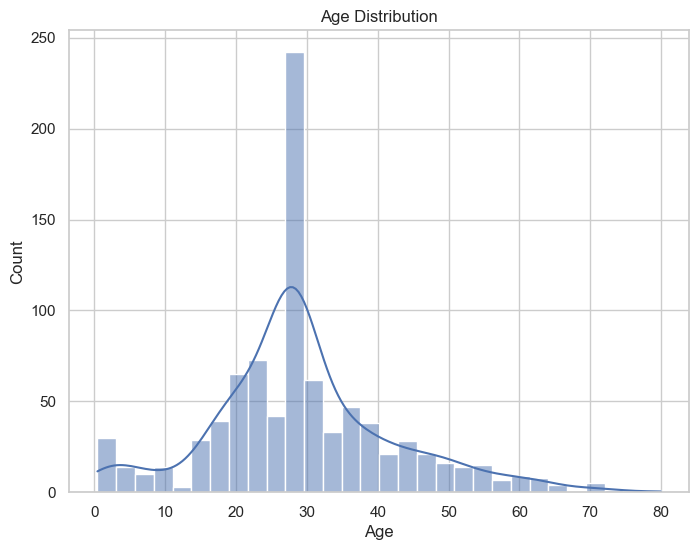

In [8]:
# Plot the distribution of Age
plt.figure(figsize=(8,6))
sns.histplot(train_data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()


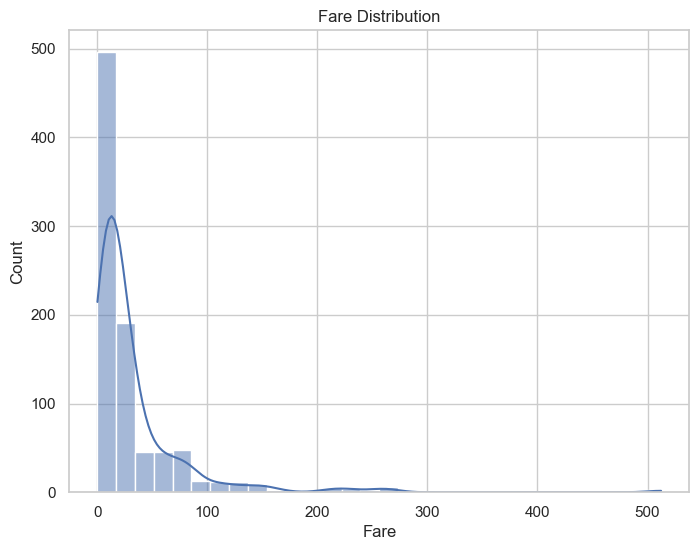

In [9]:
# Plot the distribution of Fare
plt.figure(figsize=(8,6))
sns.histplot(train_data['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()


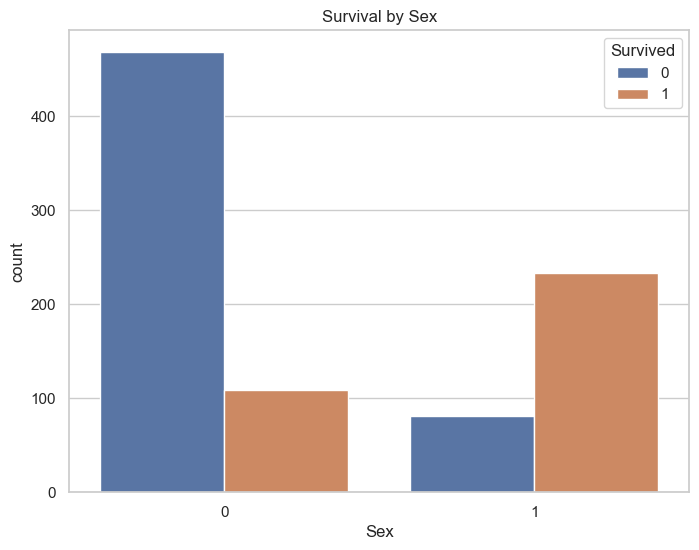

In [10]:
# Survival rate by Sex
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival by Sex')
plt.show()


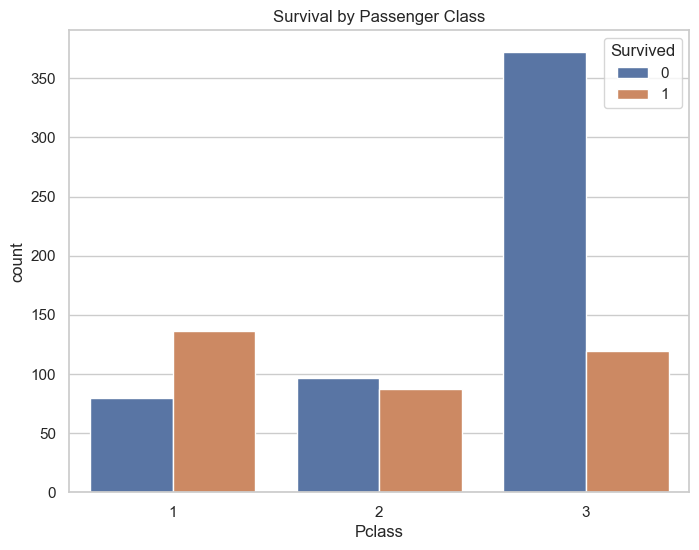

In [11]:
# Survival rate by Pclass
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival by Passenger Class')
plt.show()


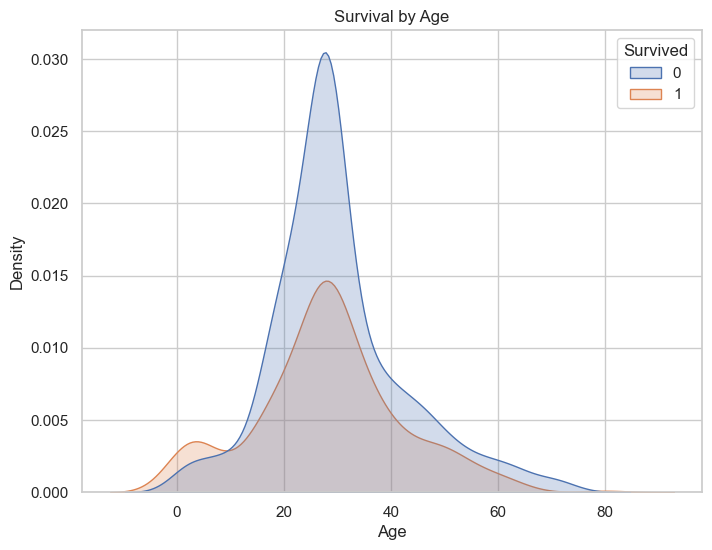

In [12]:
# Survival rate by Age
plt.figure(figsize=(8,6))
sns.kdeplot(data=train_data, x='Age', hue='Survived', fill=True)
plt.title('Survival by Age')
plt.show()


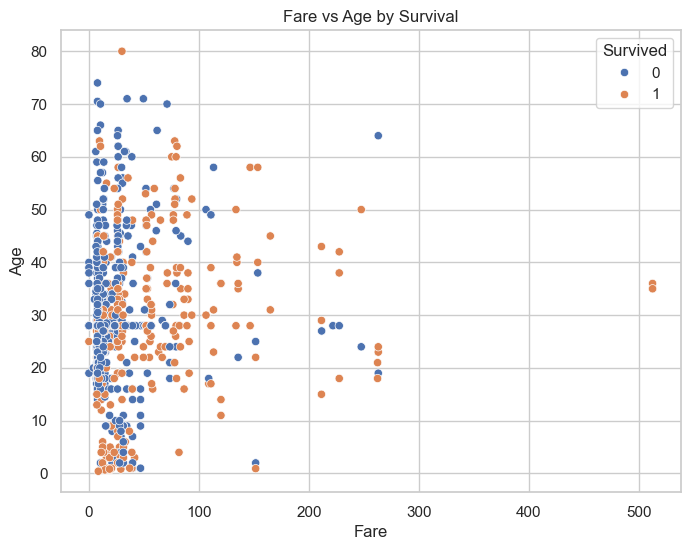

In [13]:
# Scatter plot for Fare vs Age, colored by Survival status
plt.figure(figsize=(8,6))
sns.scatterplot(x='Fare', y='Age', hue='Survived', data=train_data)
plt.title('Fare vs Age by Survival')
plt.show()


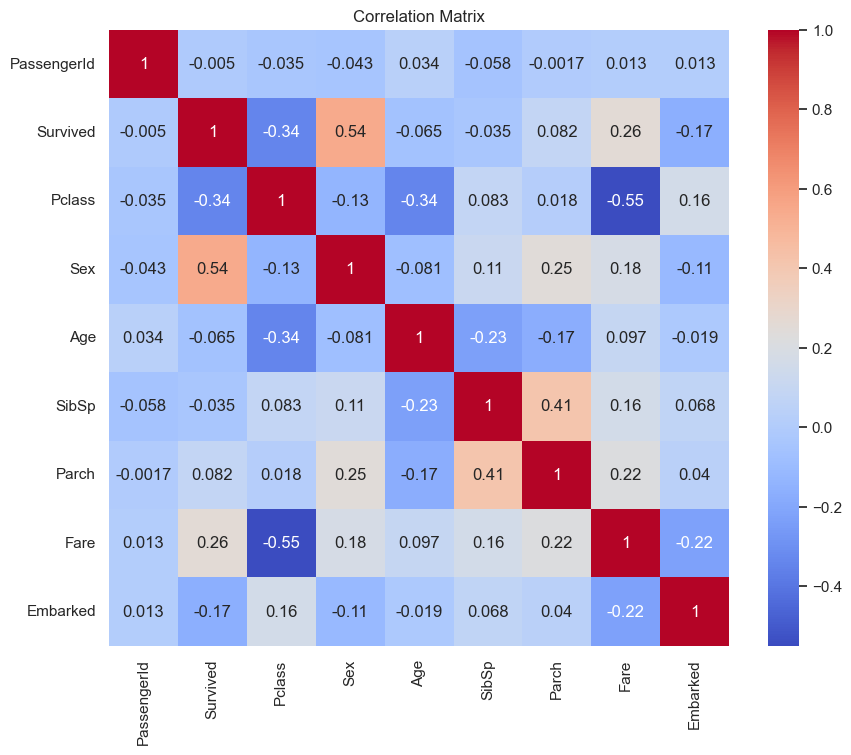

In [14]:
# Select only numeric columns from the dataset
numeric_data = train_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numeric columns
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 7. Feature Engineering

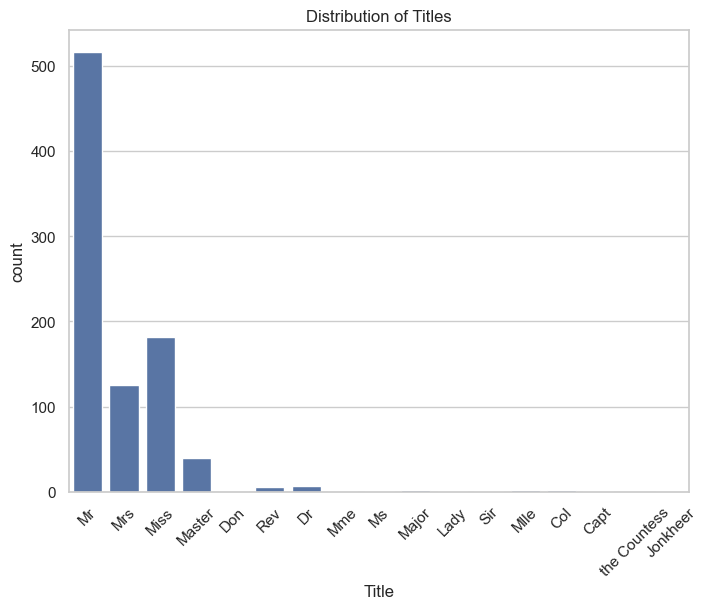

In [15]:
# Extract titles from the 'Name' column
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Check the distribution of titles
plt.figure(figsize=(8,6))
sns.countplot(x='Title', data=train_data)
plt.title('Distribution of Titles')
plt.xticks(rotation=45)
plt.show()


# 8. Survival Rates by Grouping

In [16]:
# Calculate the overall survival rate
survival_rate = train_data['Survived'].mean()
print(f"Overall Survival Rate: {survival_rate * 100:.2f}%")


Overall Survival Rate: 38.38%


In [17]:
# Group by Pclass and calculate the survival rate
pclass_survival = train_data.groupby('Pclass')['Survived'].mean()
print("Survival rate by Pclass:")
print(pclass_survival)


Survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [18]:
# Group by Sex and calculate the survival rate
sex_survival = train_data.groupby('Sex')['Survived'].mean()
print("Survival rate by Sex:")
print(sex_survival)


Survival rate by Sex:
Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


In [19]:
# Group by Age and calculate the survival rate
age_survival = train_data.groupby('Age')['Survived'].mean()
print("Survival rate by Age:")
print(age_survival.head())


Survival rate by Age:
Age
0.42    1.0
0.67    1.0
0.75    1.0
0.83    1.0
0.92    1.0
Name: Survived, dtype: float64


# 9. Conclusion

In [ ]:
- **Overall Survival Rate**: X% survived.
- **By Pclass**: Passengers in Pclass 1 had the highest survival rate.
- **By Sex**: Female passengers had a significantly higher survival rate than male passengers.
- **By Age**: Younger passengers had a higher survival rate.